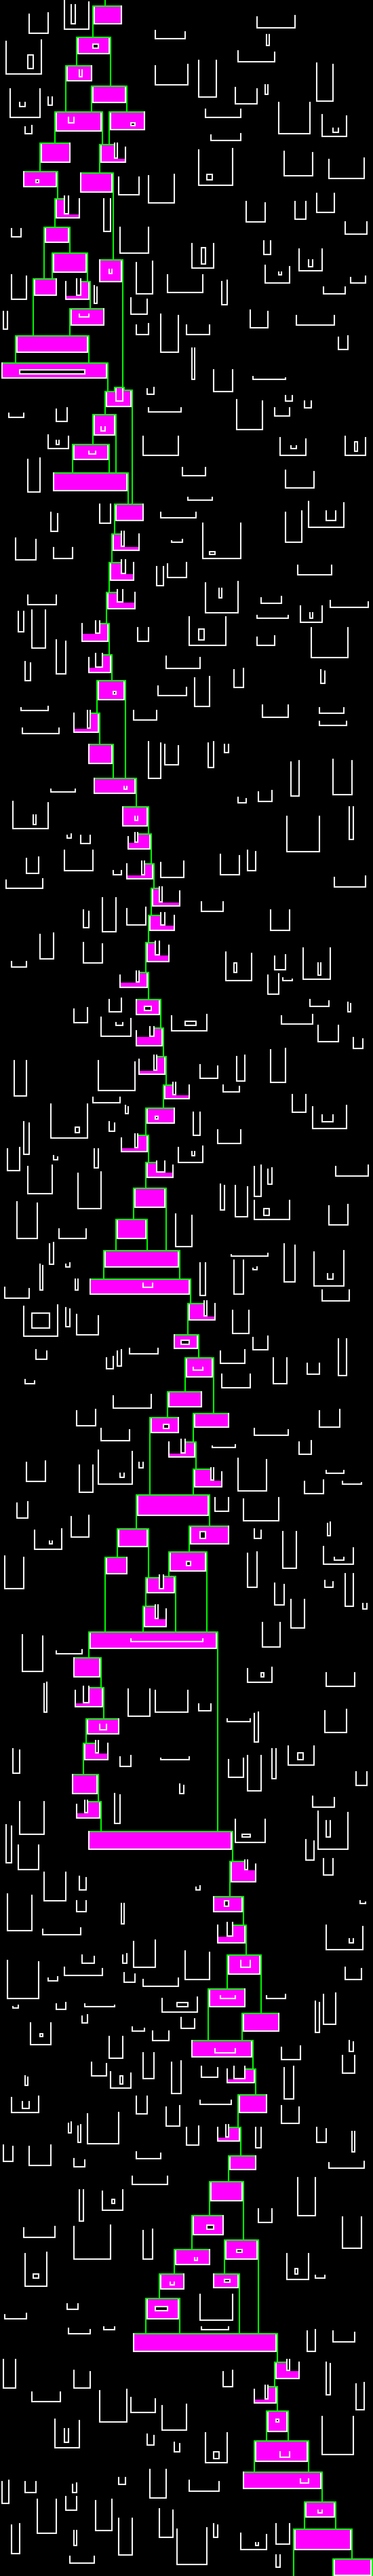

part1:  31038 31038
part2:  25250 25250


In [1]:
import re
import sys
import cv2
import time
import numpy as np
from PIL import Image
from IPython import display

sys.setrecursionlimit(10000)

def ld():
    X=[]
    Y=[]
    for l in open("17.txt").readlines():
        
        a,b,c=[int(x) for x in re.findall("[0-9]+",l)]
        while b<=c:
            if l.startswith("x"):
                X+=[a]
                Y+=[b]
            else:
                Y+=[a]
                X+=[b]
            b+=1
                
    
    return X,Y


X,Y=ld()

x0=min(X)-1
x1=max(X)+1
y0=min(Y)
y1=max(Y)


C=[[255,255,255],[255,0,255],[0,255,0]]

#clay and settled water
M={}
#water access
N={}
drips=[]
for p in zip(X,Y):
    M[p]=0
    
def printmap():
    w=x1-x0+1
    h=y1-y0+1
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in N.keys():
        if x>=x0 and x<=x1:
            if y>=y0 and y<=y1:
                pix[y-y0,x-x0,:]=C[2]
    for x,y in M.keys():
        if x>=x0 and x<=x1:
            if y>=y0 and y<=y1:
                
                pix[y-y0,x-x0,:]=C[M[(x,y)]]
    
    #pix=pix[:200,:100,:]
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))


def drip(x,y):
    global drips
    if (x,y) in drips:
        return
    drips.append((x,y))
    N[(x,y)]=1
    if not (x,y+1) in M:
        if y < y1:
            drip(x,y+1)
    else:
        blk=0
        for d in [-1,1]:
            if slide(x+d,y,d):
                blk+=1
        if blk==2:
            M[(x,y)]=1
            settle(x-1,y,-1)
            settle(x+1,y,1)
            
def settle(x,y,d):
    if not (x,y) in M:
        M[(x,y)]=1
        settle(x+d,y,d)
        
        
def slide(x,y,d):
    if (x,y) in M:
        return 1
    N[(x,y)]=1
    if not (x,y+1) in M:
        drip(x,y)
        return 0
    if (x+d,y) in M:
        #M[x,y]=1
        return 1
    return slide(x+d,y,d)
    
        

c=0
n=0
printmap()
time.sleep(1)
while 1:
    global drips
    drips=[]
    n+=1
    drip(500,y0)
    
    #time.sleep(0.1)
    cc=len(N.keys())
    if n%10==0:
        printmap()
        print(n,cc)
    if cc==c:
        printmap()
        print("part1: ", cc, 31038)
        nnn=0
        for v in M.values():
            if v == 1:
                nnn+=1
        
        print("part2: ",nnn,25250)
        break
    c=cc
    
    

